In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import tables as tb
import tensorflow as tf

In [2]:
np.random.seed(777)

In [3]:
def rescaled_range(dataset):
    dev = dataset - dataset.mean()
    cumsum = dev.cumsum()
    
    rng = []
    stdev = []
    for idx, val in enumerate(cumsum):
        r = cumsum[:idx+1].max() - cumsum[:idx+1].min()
        st = dev[:idx+1].std()
        rng.append(r)
        stdev.append(st)
    rng = np.array(rng[1:])
    stdev = np.array(stdev[1:])
    return rng/stdev, cumsum[1:], rng, stdev

### 1. Hurst exponent of random number

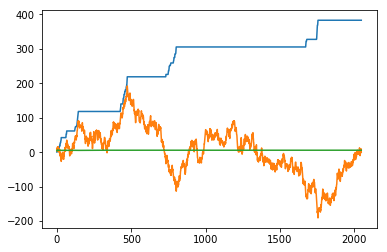

In [5]:
#height = np.random.normal(10,5,10000)
height = np.random.randint(10,30,2048)

rps, cumsum, rng, stdev = rescaled_range(height)

plt.plot(rng)
plt.plot(cumsum)
plt.plot(stdev)

slope:  0.567925347093 r:  0.947369839886


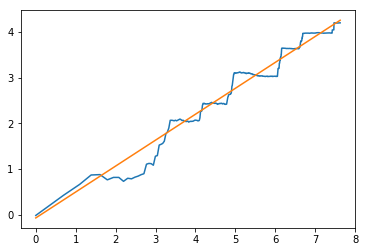

In [6]:
rps = np.log(rng[1:]/stdev[1:])
x = np.log(np.arange(1,len(rps)+1,1))
slope, intercept, r_value, p_value, std_err = stats.linregress(x, rps)
y = slope * x + intercept
plt.plot(x, rps)
plt.plot(x, y)
print('slope: ',slope, 'r: ', r_value*r_value)

#### Verifying fractal property

y = 0.5100926031230922*x + 0.06096086707411086, r^2 = 0.9924396329215016


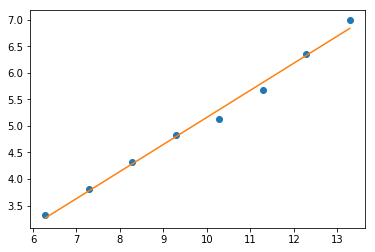

In [7]:
height = np.random.normal(10,5,10000)
rps_ave = []
size = []
length = len(height)
for i in range(8):
    step = np.rint(length/pow(2, i)).astype(np.int)
    temp = []
    for s in range(0, length, step):
        temp.append(rescaled_range(height[s:s+step])[0][-1])
    rps_ave.append(np.array(temp).mean())
    size.append(step)
    

x = np.log2(size)
y = np.log2(rps_ave)
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
y_reg = slope * x + intercept
plt.plot(x, y, 'o')
plt.plot(x, y_reg)
print(f"y = {slope}*x + {intercept}, r^2 = {r_value*r_value}")


### 2. 시장 데이터 비교

In [8]:
db = tb.open_file("data/market.hdf5")

In [45]:
euro = pd.DataFrame(db.root.AD.Daily.read())

In [46]:
euro['date'] = euro.date.astype('M8[s]')
euro.sort_values('date', inplace=True)
euro.reset_index(drop=True, inplace=True)

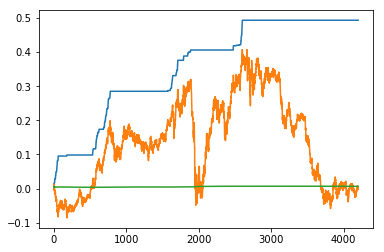

In [102]:
dataset = euro.close.diff().dropna().values
#dataset = (np.log(euro.close) - np.log(euro.close.shift(1))).dropna()[3000:3240].values
rps, cumsum, rng, stdev = rescaled_range(dataset)

plt.plot(rng)
plt.plot(cumsum)
plt.plot(stdev)

y = 0.39347305586406656*x + 1.1443315128549583, r^2 = 0.844805228531156


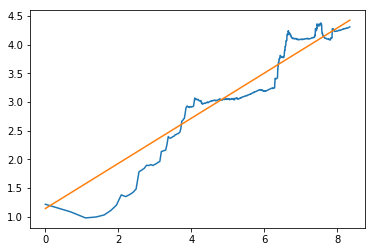

In [103]:
rps = np.log(rng[1:]/stdev[1:])
x = np.log(np.arange(1,len(rps)+1,1))
slope, intercept, r_value, p_value, std_err = stats.linregress(x, rps)

y = slope * x + intercept
plt.plot(x, rps)
plt.plot(x, y)
print(f"y = {slope}*x + {intercept}, r^2 = {r_value*r_value}")

y = 0.5404347071037345*x + -0.2620592398430306, r^2 = 0.972362175850232


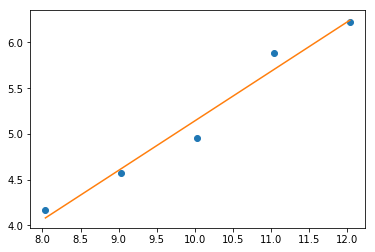

In [104]:
rps_ave = []
size = []
length = len(dataset)
for i in range(5):
    step = np.rint(length/pow(2, i)).astype(np.int)
    temp = []
    for s in range(0, length-1, step):
        temp.append(rescaled_range(dataset[s:s+step])[0][-1])
    rps_ave.append(np.array(temp).mean())
    size.append(step)
    

x = np.log2(size)
y = np.log2(rps_ave)
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
y_reg = slope * x + intercept
plt.plot(x, y, 'o')
plt.plot(x, y_reg)
print(f"y = {slope}*x + {intercept}, r^2 = {r_value*r_value}")

y = 0.33800601643764977*x + 1.9110234994607627, r^2 = 0.9350626371201805


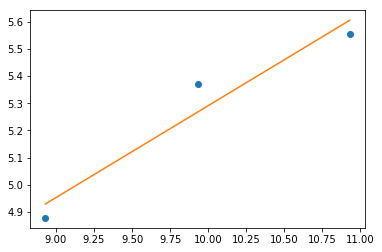

In [15]:
dataset = dataset[-int(len(dataset)/2):]
rps_ave = []
size = []
length = len(dataset)
for i in range(3):
    step = np.rint(length/pow(2, i)).astype(np.int)
    temp = []
    for s in range(0, length, step):
        temp.append(rescaled_range(dataset[s:s+step])[0][-1])
    rps_ave.append(np.array(temp).mean())
    size.append(step)
    

x = np.log2(size)
y = np.log2(rps_ave)
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
y_reg = slope * x + intercept
plt.plot(x, y, 'o')
plt.plot(x, y_reg)
print(f"y = {slope}*x + {intercept}, r^2 = {r_value*r_value}")

In [16]:
len(dataset)

1951

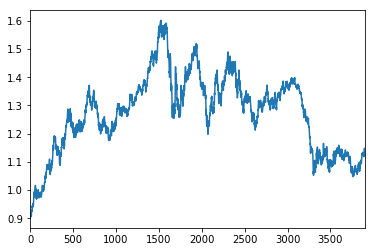

In [17]:
euro.close.plot()